## Problem : K-means Clustering

Your task is to use Python (you can use only packages numpy and/or Pandas, together with plotting package like matplotlib. That says, you are NOT allowed to use any packages that can directly apply k-means.) to implement the well-known clustering algorithm, K-means, based on a synthetic dataset cdata.csv. This dataset contains two data columns, “X” and “Y”, and one “cluster” column (1, 2, 3, and 4). In implementing K-means, you need to use “X” and “Y” as features for clustering while the “cluster” column is for your validation. Note that it is not necessary to perfectly clustering all of the data points into clusters. Also note that the “cluster” column cannot be used in clustering.

1. Randomly select data points as the initialized centroids. By default, please set K=4. Report and plot the process until convergence. The centroids also need to be plotted. An example is shown below. Note that it may not have 3 rounds (it can be 4 or 5 rounds, depend on initialized centroids

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
def read_csv_and_extract_data(filename):
    # read the CSV file
    data = pd.read_csv(filename)
    
    # extract only the x and y columns, and treat it as float
    X = data[['x', 'y']].astype(float).values
    
    return X

In [158]:
# read in data
filename = 'cdata.csv'
data = read_csv_and_extract_data(filename)

In [159]:
class KMeansClustering:
    
    def __init__(self, k=4):
        self.k = k
        self.centroids = None
    
    @staticmethod
    def euclidean_distance(data_point, centriods):
        return np.sqrt(np.sum((centriods - data_point)**2, axis=1))
        
    def fit(self, X, max_iteratations=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), #set boundary the random point within 
                                            np.amax(X, axis=0), #in every dimension
                                            size=(self.k, X.shape[1]))
        
        for _ in range(max_iteratations):
            y = []
            
            for data_point in X:
                distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)#the min value which cluster index is
                y.append(cluster_num)
            
            y = np.array(y)
            
            cluster_indices = []
            
            # for next evaluation
            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))
                
            cluster_centers = []
            
            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0: # no members in this cluster, keep the old centroid
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0]) #calculate the new centriod via mean
            
            # max_centroid_shift = np.max([KMeansClustering.euclidean_distance(c1, c2)[0] 
            #                      for c1, c2 in zip(self.centroids, cluster_centers)])
            
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001: #if the centroid diffence between new and the old is diff less then 0.0001 then stop
                break
            else:
                self.centroids = np.array(cluster_centers)
        
        return y
         
    def calculate_SSE(self, X, y):
        sse = 0
        for i, data_point in enumerate(X):
            centroid = self.centroids[y[i]]  # Get the assigned centroid for this point
            sse += np.sum((data_point - centroid) ** 2)  # Add the squared distance
        return sse

In [160]:
def plot_clusters(kmeans, data, labels):
    """
    Function to plot clusters and centroids with specific colors for each cluster and 'X' markers for centroids.
    
    Parameters:
    - kmeans: the KMeansClustering object after fitting the data
    - data: the dataset (X values) used for clustering
    - labels: the predicted labels (cluster assignments)
    """

    color_map = {
        0: 'red',    # A
        1: 'green',  # B
        2: 'blue',   # C
        3: 'yellow'  # D
    }

    # Get the corresponding color for each cluster label
    colors = [color_map[label] for label in labels]
    plt.figure(figsize=(10, 6))
    
    # plot the data points with the specified colors for each cluster
    # Plot the centroids as "X" markers with black color and larger size
    plt.scatter(data[:, 0], data[:, 1], c=colors, label="Clusters", alpha=1)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='black', marker="X", s=100, label="Centroids")
    
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10) for i in range(len(color_map))]
    labels = ['A', 'B', 'C', 'D', 'Centroids',]  # Cluster labels
    # Add a legend for clusters
    plt.legend(handles, labels, loc="upper right")
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.show()

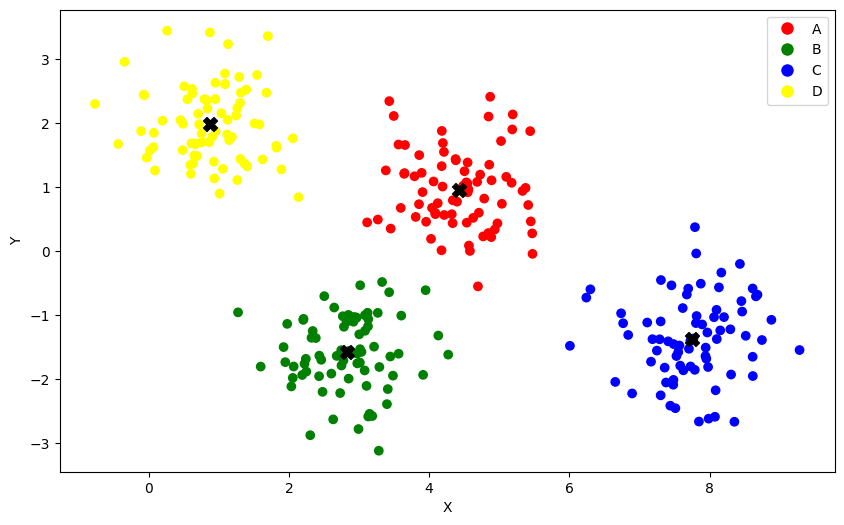

In [161]:
kmeans = KMeansClustering(k=4)
labels = kmeans.fit(data)

# Call the function to plot the clusters
plot_clusters(kmeans, data, labels)

2. Re-execute your K-means clustering algorithm by changing K from 2 to 50 (from 2 to 10 is also okay). Plot the K value (x-axis) vs. the value of Sum of Squared Error (SSE) (y-axis) as below. Note that it is reasonable and acceptable if the curve is uneven.

In [162]:
def plot_k_vs_sse(X, k_range):
    sse_values = []
    
    for k in k_range:
        kmeans = KMeansClustering(k=k)
        labels = kmeans.fit(X)
        sse = kmeans.calculate_SSE(X, labels)
        sse_values.append(sse)
    
    # Plot K vs SSE
    plt.plot(k_range, sse_values)
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

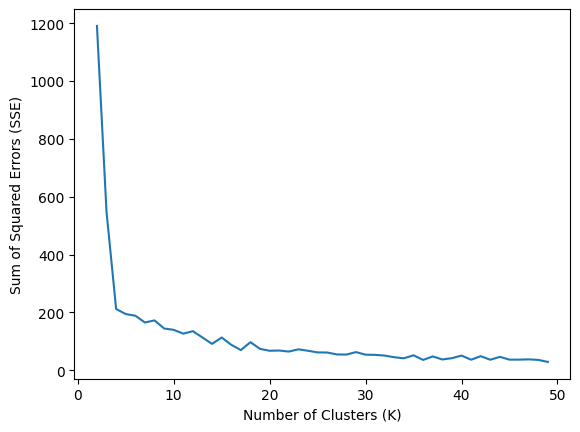

In [163]:
# apply KMeans with different values of K and calculate SSE
sse_values = []
k_values = range(2, 50)  # increase to 50 for more K values
plot_k_vs_sse(data, k_values)

3. Try 10 times of randomly initialized centroids, and plot their SSE values (y-axis).

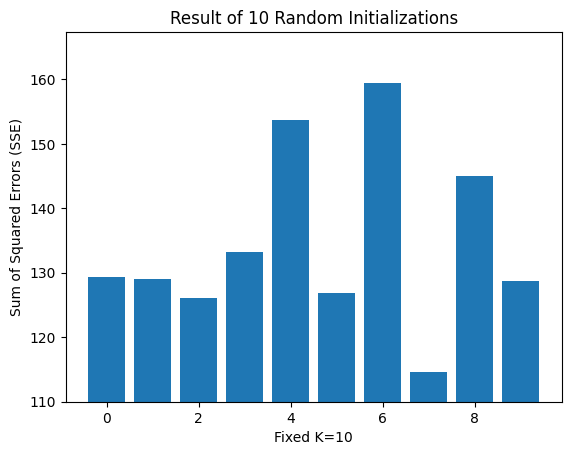

In [164]:
def plot_sse_random_initializations(X, k=10, n_runs=10):
    sse_random_runs = []
    
    for i in range(n_runs):
        kmeans = KMeansClustering(k=k)
        labels = kmeans.fit(X)
        sse = kmeans.calculate_SSE(X, labels)
        sse_random_runs.append(sse)
    
    # Plot the SSE for each random initialization
    plt.bar(range(n_runs), sse_random_runs)
    plt.xlabel(f'Fixed K={k}')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.ylim(110)
    plt.title(f'Result of {n_runs} Random Initializations')
    plt.show()


# plot SSE for 10 random initializations with fixed K=10
plot_sse_random_initializations(data, k=10, n_runs=10)